# EDA

In [1]:
from collections import defaultdict
from pathlib import Path

import numpy as np
import pandas as pd

In [2]:
directory = "data/hyperview/train_data/train_data"

In [3]:
stats_dict = defaultdict(list)

In [4]:
filenames = Path(directory).rglob("*.npz")
image_list = []
for filename in filenames:
    with np.load(filename) as npz:
        arr = np.ma.MaskedArray(**npz)
        img = arr.data
        stats_dict["max"].append(img.max())
        stats_dict["min"].append(img.min())
        stats_dict["height"].append(img.shape[1])
        stats_dict["width"].append(img.shape[2])
        image_list.append(img)

In [5]:
stats_df = pd.DataFrame.from_dict(stats_dict)
stats_df.head()

,max,min,height,width
0,3786,87,43,44
1,3031,43,136,134
2,1915,416,11,11
3,3276,382,11,11
4,3162,273,11,11


In [12]:
stats_df.describe()

,max,min,height,width
count,1732.000000,1732.000000,1732.000000,1732.000000
mean,2859.618360,245.549654,58.103349,58.941109
std,1481.411535,146.466742,49.175281,49.462518
min,1077.000000,-13.000000,11.000000,11.000000
25%,1734.000000,138.000000,11.000000,11.000000
50%,2737.500000,242.000000,42.000000,42.000000
75%,3665.250000,362.000000,107.000000,108.000000
max,17488.000000,716.000000,268.000000,284.000000


<Axes: >

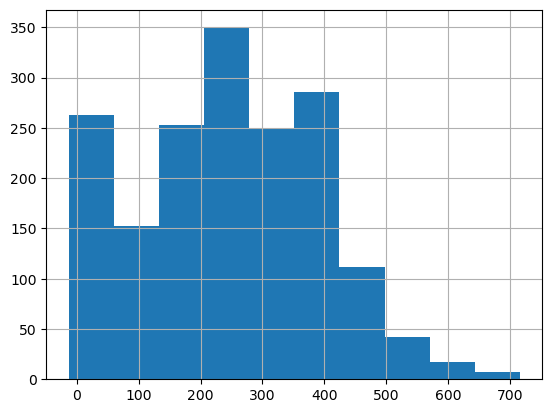

In [6]:
stats_df["min"].hist()

<Axes: >

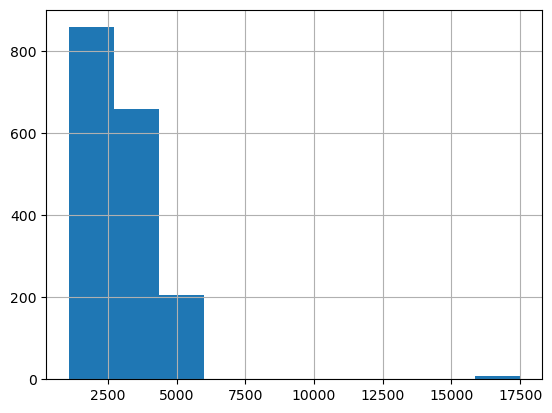

In [7]:
stats_df["max"].hist()  # what to do with outliers?

<Axes: >

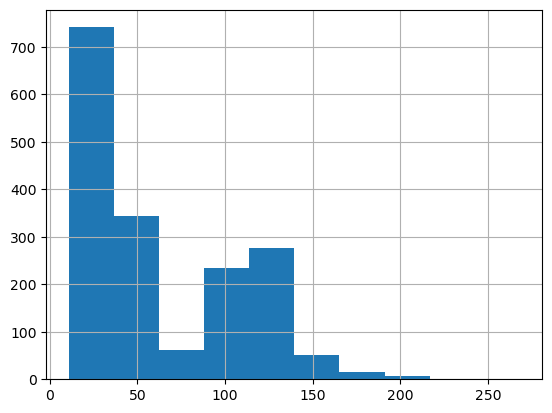

In [10]:
stats_df["height"].hist()  # big difference in sizes

<Axes: >

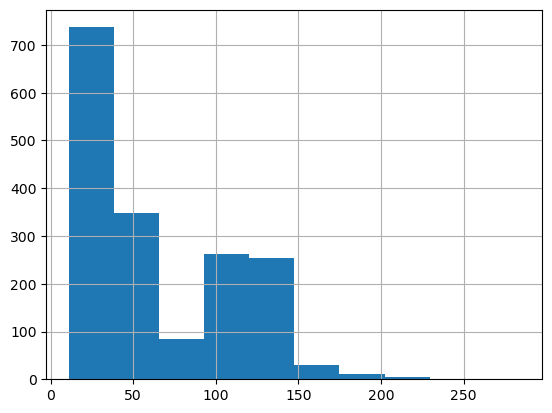

In [11]:
stats_df["width"].hist()